Compressive strength or compression strength is the capacity of a material or structure to withstand loads tending to reduce size. My data set contains 9 columns, 7 of them are talking about the cement block materials and what it is made of and 1 of them says the age of the cement block and the last column is the target column which defines the compressive strength of a concrete block.

In [18]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

# Get The Data

In [24]:
df = pd.read_csv('compresive_strength_concrete2.0.csv')
df.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [25]:
# Re naming the columns easier to read

df.columns=['cement','blast','flyash','water','superplasticiser','coarse','fine','age','ccs']

df.head()

# col=list(df.columns)
# for i in col:
#     df[i]=(df[i]-df[i].mean())/df[i].std(ddof=0)
# df

,cement,blast,flyash,water,superplasticiser,coarse,fine,age,ccs
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
cement              1030 non-null float64
blast               1030 non-null float64
flyash              1030 non-null float64
water               1030 non-null float64
superplasticiser    1030 non-null float64
coarse              1030 non-null float64
fine                1030 non-null float64
age                 1030 non-null int64
ccs                 1030 non-null float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


## Exploratory Data Analysis


___


<function matplotlib.pyplot.tight_layout(pad=1.08, h_pad=None, w_pad=None, rect=None)>

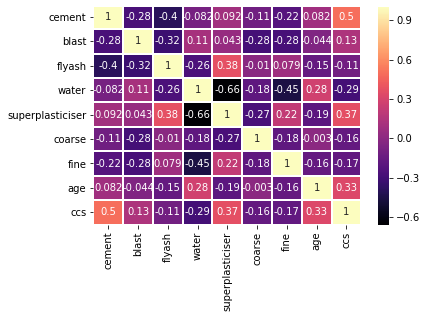

In [42]:
# Compute pairwise correlation of columns, excluding NA/null values, The lighter it is 
# the more correlation between the 2 columns.

# we notice that cement has the highest correlation among other features with respect to ccs 

ax = sns.heatmap(df.corr(),cmap='magma',linecolor='white',linewidths=1, annot = True)
ax.set_ylim(9,0.1)
plt.tight_layout

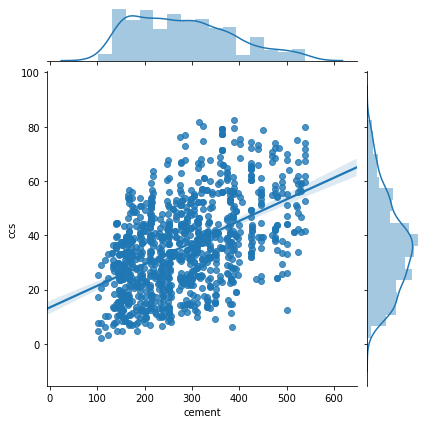

In [48]:
#it allows u to do 2 plotting at the same time, with the parameters 1 being the target column and the other being a feature.
sns.jointplot("cement", "ccs", data=df, kind="reg")

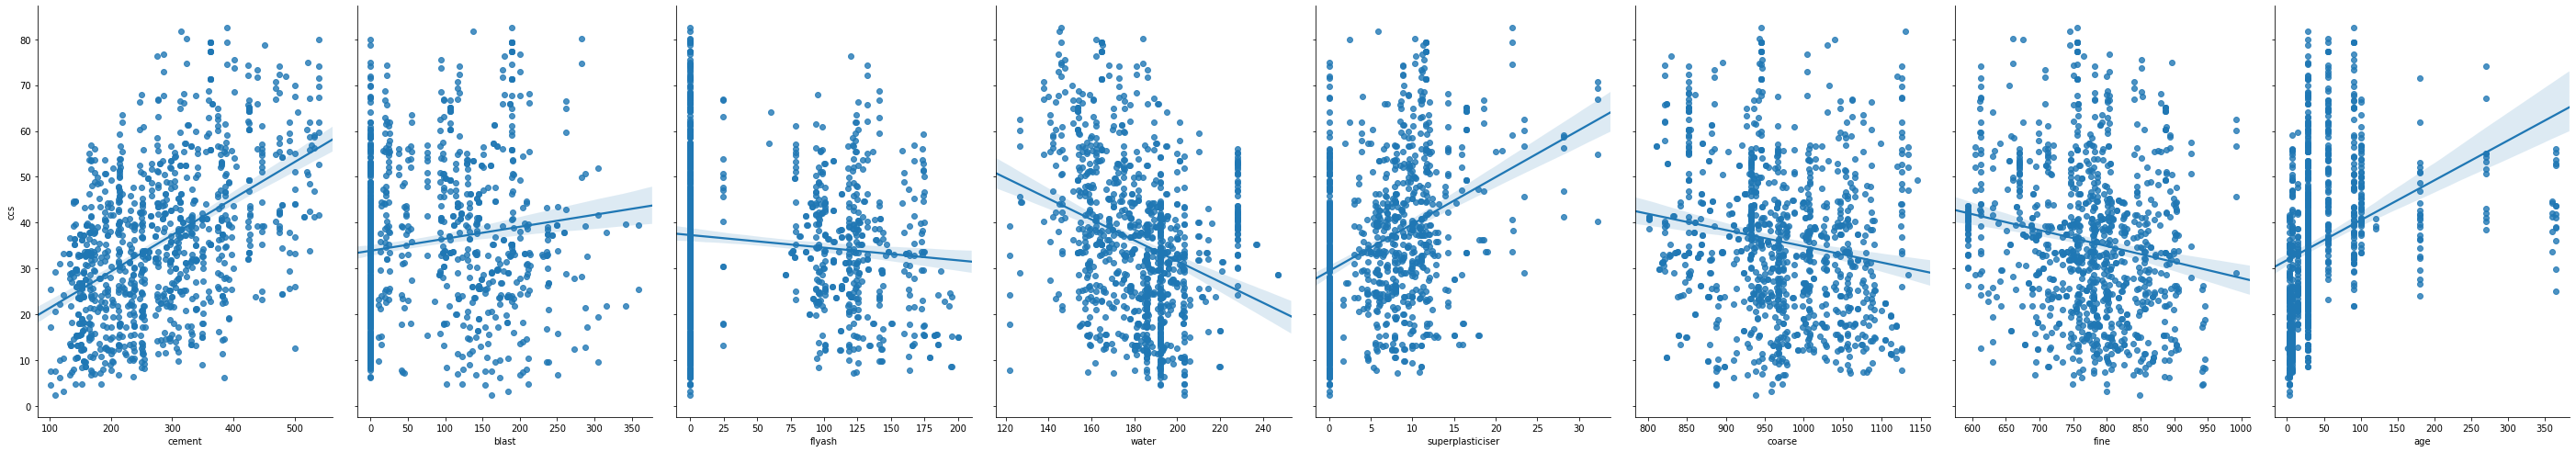

In [81]:
# visualize the relationship between the features and the response using scatterplots.
sns.pairplot(df, x_vars=['cement','blast','flyash','water','superplasticiser','coarse','fine','age'], y_vars='ccs', height=7, aspect=0.7, kind='reg')

# Pre processing the data

In [91]:
from sklearn.preprocessing import MinMaxScaler

In [93]:
scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(df)

In [94]:
scaled_features[0]

array([1.        , 0.        , 0.        , 0.32108626, 0.07763975,
       0.69476744, 0.20572002, 0.07417582, 0.96748474])

In [97]:
df = pd.DataFrame(scaled_features,columns=df.columns)

In [98]:
df.head()

,cement,blast,flyash,water,superplasticiser,coarse,fine,age,ccs
0,1.000000,0.000000,0.0,0.321086,0.07764,0.694767,0.205720,0.074176,0.967485
1,1.000000,0.000000,0.0,0.321086,0.07764,0.738372,0.205720,0.074176,0.741996
2,0.526256,0.396494,0.0,0.848243,0.00000,0.380814,0.000000,0.739011,0.472655
3,0.526256,0.396494,0.0,0.848243,0.00000,0.380814,0.000000,1.000000,0.482372
4,0.220548,0.368392,0.0,0.560703,0.00000,0.515698,0.580783,0.986264,0.522860


# Train Test Split & Training the Model

In [99]:
from sklearn.model_selection import train_test_split

In [100]:
features=df.drop('ccs',axis=1)
target=df['ccs']

In [101]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=101)

In [102]:
# import model
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
# fit the model to the training data (learn the coefficients)
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [103]:
# make predictions on the testing set
pred = lm.predict(X_test)

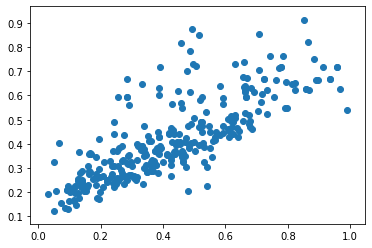

In [116]:
# if the predictions and the true values (y_test) have staright line all points above each other then
#they tend to have a good model on test data
plt.scatter(y_test , pred)

In [117]:
# Evaluating the model
from sklearn import metrics


print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

Mean Absolute Error: 0.1054048765189519
Mean Squared Error: 0.01825695120083309
Root Mean Squared Error: 0.13511828596023964


In [118]:
# it expalin 62% variance of the data
metrics.explained_variance_score(y_test, pred)

0.6203962147051261

In [120]:

coeff_df = pd.DataFrame(lm.coef_,features.columns,columns=['ccs'])
coeff_df

,ccs
cement,0.591169
blast,0.399442
flyash,0.188313
water,-0.277468
superplasticiser,0.101150
coarse,0.019674
fine,0.050642
age,0.544860


Text(0.5, 1.0, '  | Predicted cement strength with respect to cement in the block')

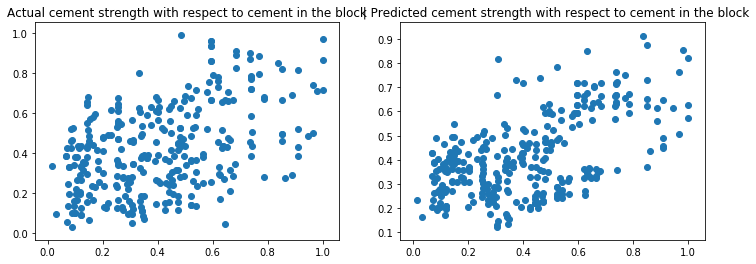

In [126]:
# We can see the amount of error between the actual and predicted values.
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
axes[0].scatter(X_test['cement'], y_test)
axes[0].set_title("Actual cement strength with respect to cement in the block")

axes[1].scatter(X_test['cement'], pred)
axes[1].set_title("  | Predicted cement strength with respect to cement in the block")

# We notice from our data set that the most feature that is directly propotional to our target is the "Cement" and the feature with the most inversily propotional to our target is "Water".